# Statiscal Analysis of Insights

## Data Setup

In [93]:
# This works so long as the importing script is run from its containing directory. ie.:
# `visual-data-science/Part 2/notebooks`
import sys
sys.path.append('../')  
from src.utils import setup_data


df_deaths, df_recovered, df_total = setup_data()

In [94]:
df_total.drop(["country"], axis=1, inplace=True)

## Preprocessing

In [95]:
import pandas as pd


df_deaths_daily = df_deaths.iloc[:,1:-5].diff(axis=1).fillna(0)
df_recovered_daily = df_recovered.iloc[:,1:-5].diff(axis=1).fillna(0)
df_total_daily = df_total.iloc[:,1:-5].diff(axis=1).fillna(0)

missing_columns = ["Country/Region", "iso_code", "location", "continent", "gdp_per_capita","population"]

for col in missing_columns:
    df_deaths_daily[col] = df_deaths[col]
    df_recovered_daily[col] = df_recovered[col]
    df_total_daily[col] = df_total[col]

## Insight 1

In [96]:
from datetime import datetime, timedelta
yesterday = datetime.now() - timedelta(2)
selected_date = datetime.strftime(yesterday, "%m/%#d/%y")

df_total["cases_per_capita"] = df_total[selected_date] / df_total["population"]

correlation = df_total["cases_per_capita"].corr(df_total["gdp_per_capita"], method="pearson")
correlation

0.37829443789547984

## Insight 2

In [100]:
austria = df_total_daily.loc[df_total_daily["iso_code"]=="AUT"]

In [159]:
first = austria.loc[:, "1/22/20":"4/6/20"]
second = austria.loc[:, "8/21/20":selected_date]

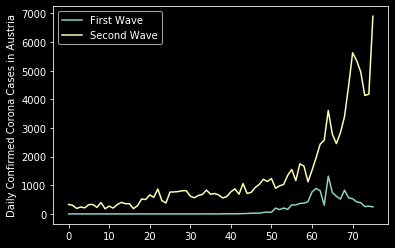

In [162]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')
plt.plot(list(first.values[0]), label="First Wave")
plt.plot(list(second.values[0]), label="Second Wave")
plt.ylabel('Daily Confirmed Corona Cases in Austria')
plt.legend()
plt.show()

In [163]:
from scipy import stats

stats.ttest_ind(first.values[0],second.values[0])

Ttest_indResult(statistic=-6.908884206944866, pvalue=1.3007700245958413e-10)

## Insight 3

In [168]:
main = df_total_daily.loc[df_total_daily["iso_code"].isin(["USA", "BRA", "IND"])]
rest = df_total_daily.loc[~df_total_daily["iso_code"].isin(["USA", "BRA", "IND"])]

In [182]:
week = datetime.now() - timedelta(8)
week_date = datetime.strftime(week, "%m/%#d/%y")

In [183]:
month = datetime.now() - timedelta(32)
month_date = datetime.strftime(month, "%m/%#d/%y")

In [201]:
# week
main_week = main.loc[:, week_date:selected_date].sum(axis=0).values
total_week = df_total_daily.loc[:, week_date:selected_date].sum(axis=0).values
rest_week = rest.loc[:, week_date:selected_date].sum(axis=0).values

main_list = []
rest_list = []

In [202]:
for i in range(len(main_week)):
    print(main_week[i]/total_week[i], rest_week[i]/total_week[i])
    main_list.append(main_week[i]/total_week[i])
    rest_list.append(rest_week[i]/total_week[i])

0.2973469603318849 0.7026530396681151
0.29762298973822576 0.7023770102617742
0.3252828779381435 0.6747171220618565
0.29894057824162423 0.7010594217583758
0.25713758137451725 0.7428624186254827
0.3104164375945247 0.6895835624054754
0.2962568115786796 0.7037431884213204


In [203]:
print(sum(main_list)/len(main_list), sum(rest_list)/len(rest_list))

0.2975720338282285 0.7024279661717715


In [204]:
# month
main_month = main.loc[:, month_date:selected_date].sum(axis=0).values
total_month = df_total_daily.loc[:, month_date:selected_date].sum(axis=0).values
rest_month = rest.loc[:, month_date:selected_date].sum(axis=0).values

main_list = []
rest_list = []

In [205]:
for i in range(len(main_month)):
    print(main_month[i]/total_month[i], rest_month[i]/total_month[i])
    main_list.append(main_month[i]/total_month[i])
    rest_list.append(rest_month[i]/total_month[i])

0.34169118471407056 0.6583088152859294
0.4821558901025495 0.5178441098974504
0.4593161424063862 0.5406838575936138
0.42968604402115107 0.5703139559788489
0.4382425962050009 0.5617574037949992
0.47077703264256376 0.5292229673574362
0.4607161746411305 0.5392838253588695
0.32321981424148605 0.676780185758514
0.38418490224794705 0.6158150977520529
0.4058209731570071 0.594179026842993
0.382461489285846 0.617538510714154
0.3945364729449174 0.6054635270550826
0.41988083671821047 0.5801191632817896
0.3649472301999143 0.6350527698000856
0.2990465971657066 0.7009534028342934
0.35476287447994265 0.6452371255200573
0.32319870569996756 0.6768012943000324
0.3220159253063872 0.6779840746936128
0.33564940789486897 0.664350592105131
0.38973362378751936 0.6102663762124807
0.3390153772797711 0.6609846227202288
0.22123354143968943 0.7787664585603106
0.31547905865119596 0.684520941348804
0.3081674148143055 0.6918325851856945
0.2973469603318849 0.7026530396681151
0.29762298973822576 0.7023770102617742
0.325

In [207]:
print(sum(main_list)/len(main_list), sum(rest_list)/len(rest_list))

0.35641753376919777 0.6435824662308023
